# Exploration des relevés de données des bâtiments 

## Sommaire

* [1 - Traitement des données](#chapter1)
    * [1.1. Traitement des données de 2015](#section_1_1)
    * [1.2. Traitement des données de 2016](#Section_1_2)
    * [1.3. Création d'un dataset unique](#section_1_3)
        * [Traitement du dataset crée](#section_1_3_1)
        * [Suppression des données aberrantes](#section_1_3_2)
        * [Normalisation des modalités](#section_1_3_3)
    * [1.4. Création de nouvelles variables](#section_1_4)
    * [1.5. Visualisation du dataset crée](#section_1_5)
 
    
    
* [2 - Analyses descriptives](#chapter2)
    * [2.1. Données géographiques](#section_2_1)
    * [2.2. Analyses univariées](#section_2_2)
    * [2.3. Analyses bivariées](#section_2_3)
    


* [3 - Références bibliographiques](#chapter3)

In [172]:
# importation des librairies nécessaires à l'exploration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import missingno as msno

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import pingouin as pg

In [173]:
# Paramétrage visuel
sns.set_palette("Pastel2")

## 1 - Traitement des données <a class="anchor" id="chapter1"></a>

On va commencer par analyser les jeux de données de manière isolée avant de les regrouper en un seul dataset. On commence donc le chargement des données de 2015 et par regarder la manière dont elles sont présentées. 

### 1.1) Traitement des données de 2015 <a class="anchor" id="section_1_1"></a>

In [174]:
# Chargement du fichier de 2015
filepath_2015 = 'datasets/2015-building-energy-benchmarking.csv'
df_2015 = pd.read_csv(filepath_2015)
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [175]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

Les chaînes de caractères sont écrites en majuscule, on va donc les passer en minuscule avec la première lettre en majuscule. On va aussi s'intéresser aux valeurs manquantes. 

In [176]:
# Passage des chaînes de caractères en minuscule
df_2015['PropertyName'] = df_2015["PropertyName"].str.capitalize()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.capitalize()

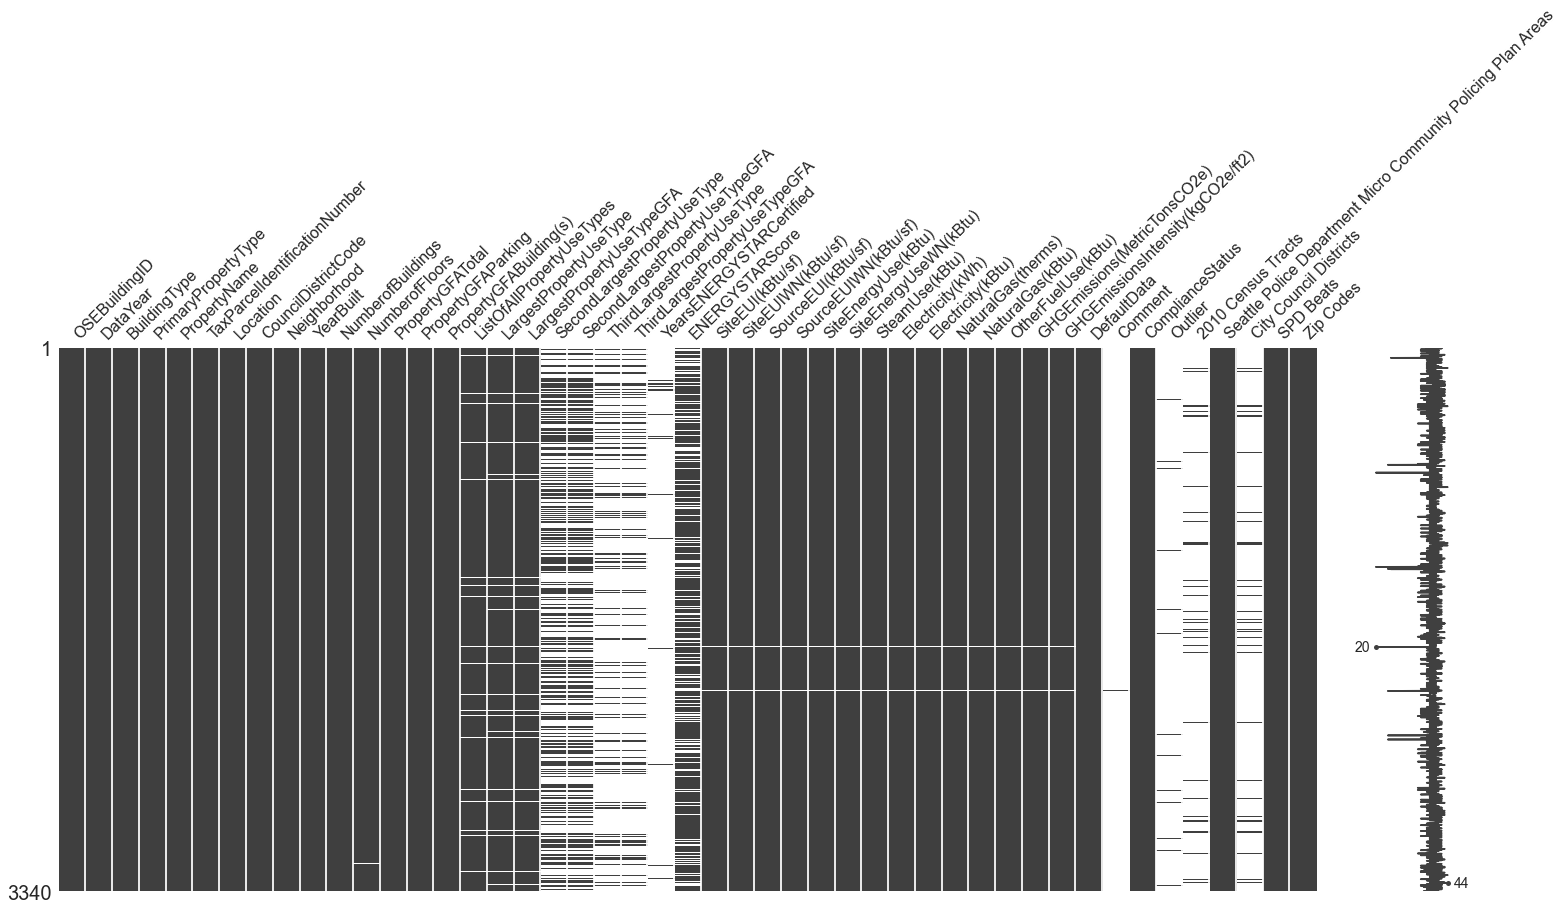

In [177]:
msno.matrix(df_2015);

In [178]:
# Suppression des colonnes avec plus de 50% de valeurs manquantes
# Suppression des lignes avec plus de 4 NaN
df_2015 = df_2015.loc[:, df_2015.isnull().mean() <.50]

In [179]:
# Harmonisation des noms de colonnes avec le dataset de 2016
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity",
                        "Zip Codes" : "ZipCode"}, inplace=True)

### 1.2) Traitement des données de 2016 <a class="anchor" id="section_1_2"></a>

Les données de 2016 sont traitées de la même manière que celle de 2015 pour permettre de pouvoir réunir les deux datasets ensemble. Les colonnes supprimées pour le dataset de 2015 ont été supprimés pour celui de 2016. 

In [180]:
# Chargement du fichier de 2016
filepath_2016 = 'datasets/2016-building-energy-benchmarking.csv'
df_2016 = pd.read_csv(filepath_2016)
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


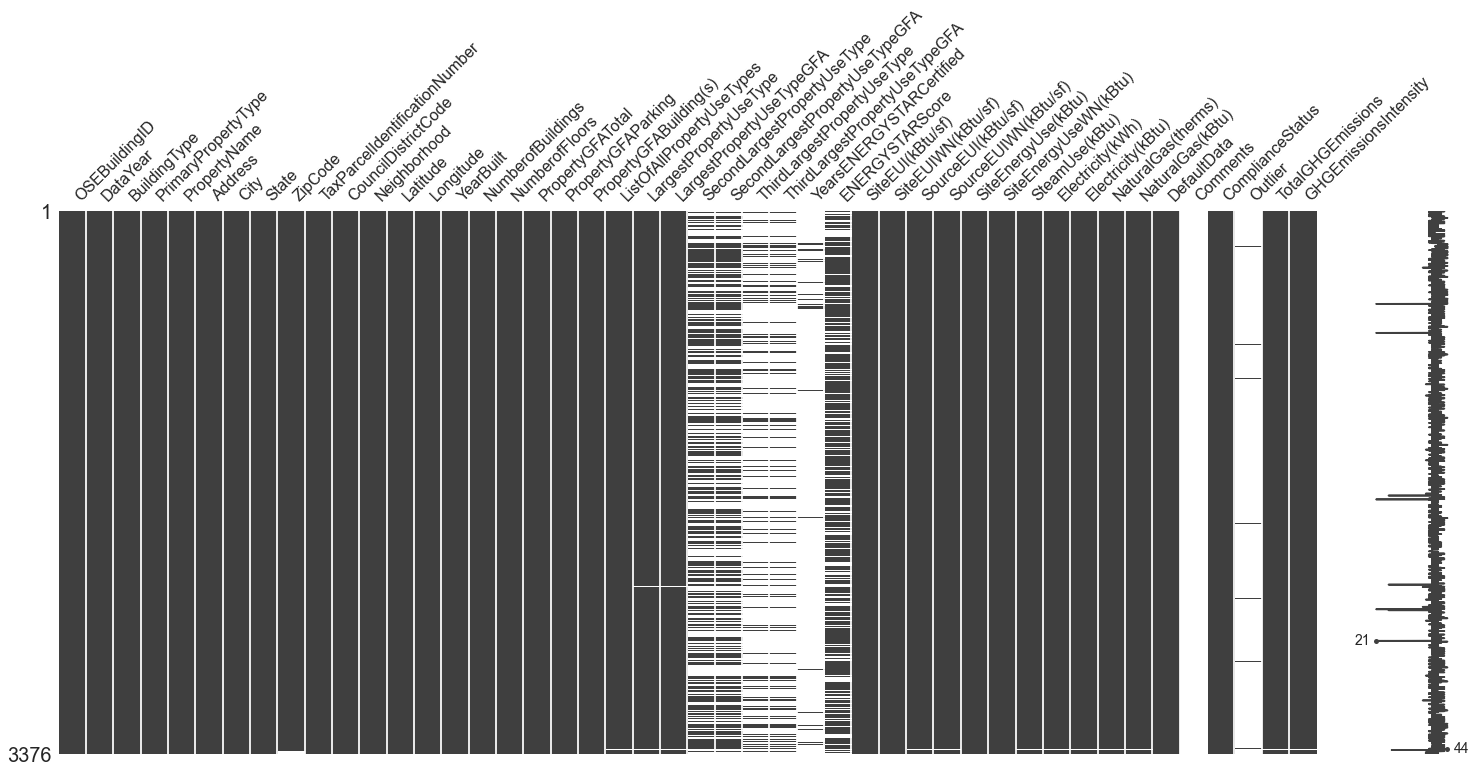

In [181]:
msno.matrix(df_2016);

In [182]:
df_2016['PropertyName'] = df_2016["PropertyName"].str.capitalize()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.capitalize()

In [183]:
df_2016 = df_2016.loc[:, df_2016.isnull().mean() <.50]

In [184]:
coord = df_2016[["OSEBuildingID", "Latitude", "Longitude"]]

In [185]:
df_2015 = df_2015.merge(coord, on="OSEBuildingID")


### 1.3) Création d'un dataset avec les données de 2015 & 2016 <a class="anchor" id="section_1_3"></a>

On effectue une jointure entre nos deux datasets pour n'en créer qu'un seul. 

In [186]:
# Jointure entre le dataset de 2015 et de 2016
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
0,1,2015,NonResidential,Hotel,Mayflower park hotel,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,Downtown,1927,...,No,Compliant,14.0,31.0,18081.0,47.61220,-122.33799,NaN,NaN,NaN
1,2,2015,NonResidential,Hotel,Paramount hotel,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,Downtown,1996,...,No,Compliant,14.0,31.0,18081.0,47.61317,-122.33393,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,Westin hotel,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,Downtown,1969,...,Yes,Compliant,56.0,31.0,18081.0,47.61393,-122.33810,NaN,NaN,NaN


#### 1.3.1) Traitement du dataset crée <a class="anchor" id="section_1_3_1"></a>

Certains bâtiments ont une vocation de résidence. On va donc se concentrer sur la conservation de quatre types de bâtiments qui n'ont pas vocation à servir de résidence. 

In [187]:
# Conservation des bâtiments non résidentiel
df = df.loc[(df["BuildingType"] == "NonResidential") |
            (df["BuildingType"] == "SPS-District K-12")| 
            (df["BuildingType"] == "Nonresidential COS")|
            (df["BuildingType"] == "Campus")]

Certaines chaînes de caractères ne sont pas normalisées et contiennent des différences, on va donc harmoniser ces chaînes de caractères pour éviter d'avoir deux catégories pour la même modalité. 

In [188]:
# Harmonisation des chaînes de caractères
char_correction = {"Distribution Center\n" : "Distribution Center",
                   "Self-Storage Facility\n" : "Self-Storage Facility",
                   "Restaurant\n" : "Restaurant",
                   "Supermarket / Grocery Store": "Supermarket/Grocery Store",
                   "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in char_correction.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [189]:
neighborhood_correction = {"Delridge neighborhoods": "Delridge"}

for key, value in neighborhood_correction.items():
    df["Neighborhood"].loc[df["Neighborhood"].str.contains(key, case=False, regex=False)] = value

Enfin, l'observation des différentes modalités du type de propriétés primaires, on remarque qu'il reste des bâtiments à caractère résidentiel. On supprime donc ces entrées pour ne conserver que les bâtiments non-résidentiels.

In [190]:
# retrait des propriétés qui sont résidentiels
df = df.loc[~(df["PrimaryPropertyType"] == "Low-Rise Multifamily")]

#### 1.3.2) Suppression des données aberrantes <a class="anchor" id="section_1_3_2"></a>

On va regarder s'il n'y a pas des valeurs négatives dans le dataset crée.

In [191]:
df.loc[df['Electricity(kBtu)'] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
6490,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt center,7234600195,NaN,3,Central,2013,...,False,Compliant,NaN,NaN,98122.0,47.61432,-122.31257,1501 E. Madison St.,Seattle,WA


Après recherche, il ne s'agit pas d'une erreur mais d'un bâtiment à énergie positive. Il s'agit bien d'un bâtiment non-résidentiel qui héberge des bureaux. Cet immeuble possède des panneaux solaires pour s'alimenter en électricité et aussi produire de l'électricité verte qui pourra être acheminé à des bâtiments de la ville. Il possède aussi des puits de géothermie, est construit avec des matériaux respectueux de l'environnement et a une orientation qui lui permet de profiter de 82% d'ensoleillement. 


Pour plus d'informations : [Site du bullit center](!https://bullittcenter.org/).

Par précaution, on supprime donc toutes les valeurs énergétiques qui sont inférieures à 0 pour ne pas perturber la suite de l'analyse et la création du modèle. 

In [192]:
df = df.loc[df['Electricity(kBtu)'] > 0]
df = df.loc[df["TotalGHGEmissions"] > 0]
df = df.loc[df["GHGEmissionsIntensity"] > 0]
df = df.loc[df["PropertyGFATotal"] > 0]
df = df.loc[df["SiteEnergyUse(kBtu)"] > 0]

On finit par supprimer les informations non utilisées et redondantes de notre dataset.

In [193]:
# Suppression des colonnes redondantes et non utilisées dans la suite
df.drop(["PropertyName","LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
         "SiteEnergyUseWN(kBtu)", "Electricity(kWh)", "NaturalGas(therms)", "TaxParcelIdentificationNumber","Location","CouncilDistrictCode",
         "ListOfAllPropertyUseTypes", "LargestPropertyUseType",
         "DefaultData", "ComplianceStatus", "State", 
         "Seattle Police Department Micro Community Policing Plan Areas","SPD Beats", "ZipCode"], axis=1, inplace=True)

#### 1.3.3) Harmonisation des modalités <a class="anchor" id="section_1_3_3"></a>

Certains bâtiments ont la même vocation mais ont des appelations différentes. On va les regrouper sous le même nom. 

In [194]:
# Regroupement des établissements scolaires dans une catégorie unique
property_use = {"College/University" : "University",
                "SPS-District K-12" : "K-12 School"}

for key, value in property_use.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [195]:
# Regroupement des bureaux dans une catégorie unique
property_type = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office"}

for key, value in property_type.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [196]:
df.shape

(3245, 24)

On regarde si la consommation d'énergie a baissé entre l'année 2015 et 2016. On fait de même avec les émissions de gaz à effets de serre. 

In [197]:
energy_2015 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2015)].mean()
energy_2016 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2016)].mean()
diff_energy = energy_2016 - energy_2015

print("Consommation d'énergie en 2015: " + str(energy_2015) + " kBtu")
print("Consommation d'énergie en 2016: " + str(energy_2016) + " kBtu")
print("Différence de consommation entre 2015 et 2016: " + str(diff_energy) + " kBtu")

Consommation d'énergie en 2015: 7685453.08915212 kBtu
Consommation d'énergie en 2016: 8546078.813653013 kBtu
Différence de consommation entre 2015 et 2016: 860625.7245008927 kBtu


In [198]:
co2_2015 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2015)].mean()
co2_2016 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2016)].mean()
diff_co2 = co2_2016 - co2_2015


print("Emissions de CO2 en 2015: " + str(co2_2015) + " MetricTonsCO2e")
print("Emissions de CO2 en 2016: " + str(co2_2016) + " MetricTonsCO2e")
print("Différence de consommation entre 2015 et 2016: " + str(diff_co2) + " MetricTonsCO2e")

Emissions de CO2 en 2015: 167.65364089775582 MetricTonsCO2e
Emissions de CO2 en 2016: 186.88524070688618 MetricTonsCO2e
Différence de consommation entre 2015 et 2016: 19.23159980913036 MetricTonsCO2e


### 1.4) Création de nouvelles variables <a class="anchor" id="section_1_4"></a>

On transforme la variable "Nombre d'étages" et "Nombre de bâtiments" en variable catégorielle. 


In [199]:
def nbFloors(row):
    if row["NumberofFloors"] == 0:
        val="0f"
    elif row['NumberofFloors'] == 1:
        val="1f"
    else:
        val="2+f"
    return val

df['NbofFloors'] = df.apply(nbFloors, axis=1)

In [200]:
def nbBuilding(row):
    if row["NumberofBuildings"] == 0:
        val="0b"
    elif row['NumberofBuildings'] == 1:
        val="1b"
    else:
        val="2+b"
    return val

df['NbofBuildings'] = df.apply(nbBuilding, axis=1)

On remplace l'année de construction du bâtiment par son âge

In [201]:
df["Age"] = df["DataYear"] - df["YearBuilt"]

On peut aussi ajouter une variable qui correspond aux "degree-days" (Degré Jour Unifié en France). On a donc récupéré les deux valeurs de ces températures sur ce site : [energystar.gov](!https://portfoliomanager.energystar.gov/pm/degreeDaysCalculator)

In [202]:
def degreeDaysH(row):
    if row["DataYear"] == 2015:
        val = 4005
    else:
        val = 4093
    return val

def degreeDaysC(row):
    if row["DataYear"] == 2015:
        val = 409
    else:
        val = 252
    return val

df['degreeDaysH'] = df.apply(degreeDaysH, axis=1)
df['degreeDaysC'] = df.apply(degreeDaysC, axis=1)

On va créer une variable "Has a Parking".

In [203]:
def HasParking(row):
    if row["PropertyGFAParking"] <= 0:
        val="No"
    else:
        val="Yes"
    return val

df['HasParking'] = df.apply(HasParking, axis=1)

On va créer des clusters à partir des points de géolocalisation (latitude et longitude) pour créer des zones.

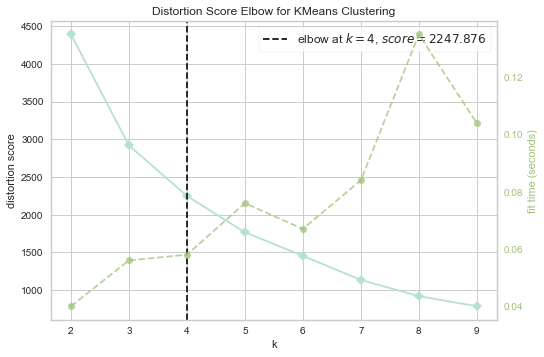

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

scaler = StandardScaler()
X = np.abs(df[["Latitude", "Longitude"]])
X_scaled = scaler.fit_transform(X)

model = KMeans()
visualizer = KElbowVisualizer(model, k =(2, 10))
visualizer.fit(X_scaled)
visualizer.show();

In [205]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

clusters = pd.DataFrame(pred, index=df["OSEBuildingID"]).reset_index()
clusters.columns = ["OSEBuildingID", "Clusters"]
clusters.head(3)

,OSEBuildingID,Clusters
0,1,1
1,2,1
2,3,1


In [206]:
df = pd.merge(df, clusters, on="OSEBuildingID")
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,Longitude,Address,City,NbofFloors,NbofBuildings,Age,degreeDaysH,degreeDaysC,HasParking,Clusters
0,1,2015,NonResidential,Hotel,Downtown,1927,1.0,12.0,88434,0,...,-122.33799,NaN,NaN,2+f,1b,88,4005,409,No,1
1,1,2015,NonResidential,Hotel,Downtown,1927,1.0,12.0,88434,0,...,-122.33799,NaN,NaN,2+f,1b,88,4005,409,No,1
2,1,2016,NonResidential,Hotel,Downtown,1927,1.0,12.0,88434,0,...,-122.33799,405 Olive way,Seattle,2+f,1b,89,4093,252,No,1
3,1,2016,NonResidential,Hotel,Downtown,1927,1.0,12.0,88434,0,...,-122.33799,405 Olive way,Seattle,2+f,1b,89,4093,252,No,1
4,2,2015,NonResidential,Hotel,Downtown,1996,1.0,11.0,103566,15064,...,-122.33393,NaN,NaN,2+f,1b,19,4005,409,Yes,1


### 1.5) Visualisation du dataset obtenu <a class="anchor" id="section_1_5"></a>

In [207]:
# Suppression des colonnes non utilisées
df.drop(["OSEBuildingID", "Address", "DataYear", "BuildingType", "PropertyGFABuilding(s)", "PropertyGFAParking", "SourceEUIWN(kBtu/sf)", "SteamUse(kBtu)",
         "Electricity(kBtu)", "NaturalGas(kBtu)", "OtherFuelUse(kBtu)", "GHGEmissionsIntensity", "City"], axis=1, inplace=True)

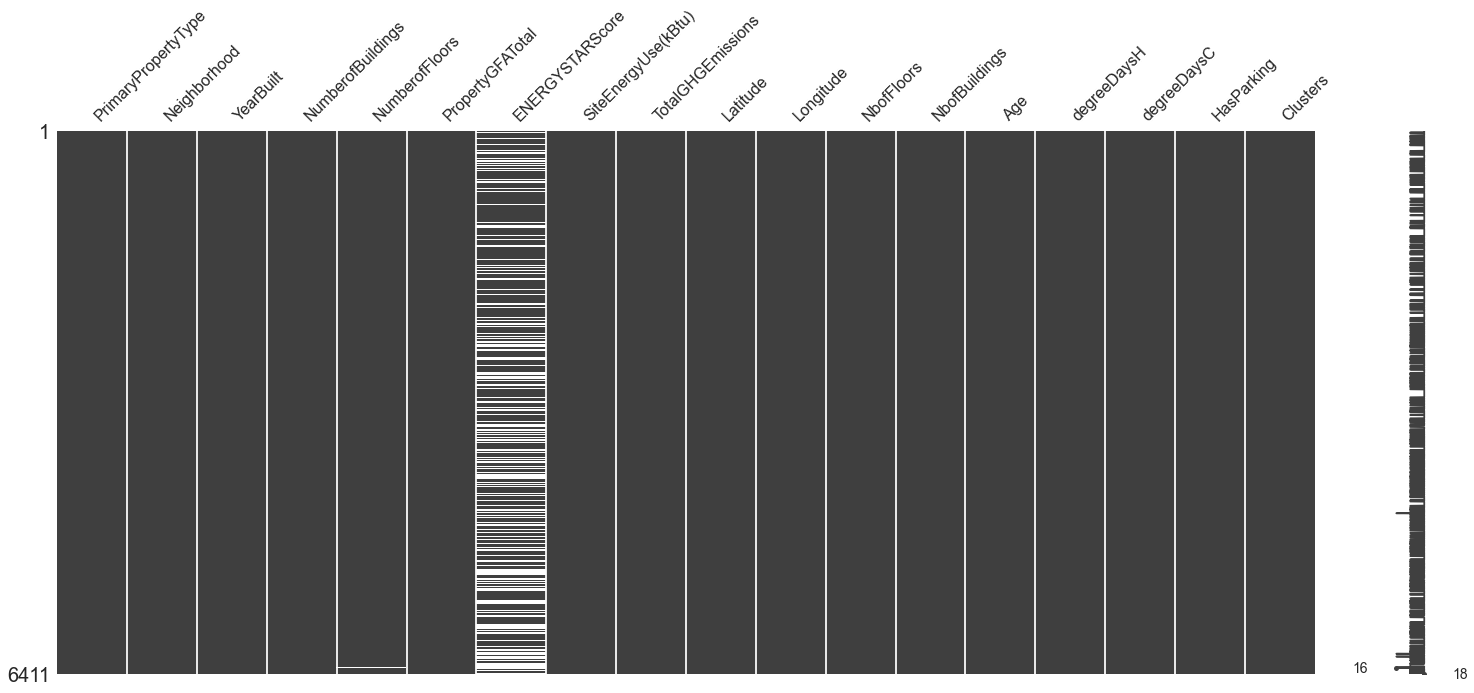

In [208]:
msno.matrix(df);

In [209]:
df.to_csv("datasets/benchmark_total.csv", index=False)

Maintenant que nos données ont été traités et nettoyés, on va sauvegarder ce dataset pour la création du modèle. Dans la suite de ce notebook, on va pouvoir faire l'analyse exploratoire de nos données. 

## 2 - Analyse exploratoire <a class="anchor" id="chapter2"></a>

In [210]:
df.shape

(6411, 18)

###  2.1) Données géographiques <a class="anchor" id="section_2_1"></a>

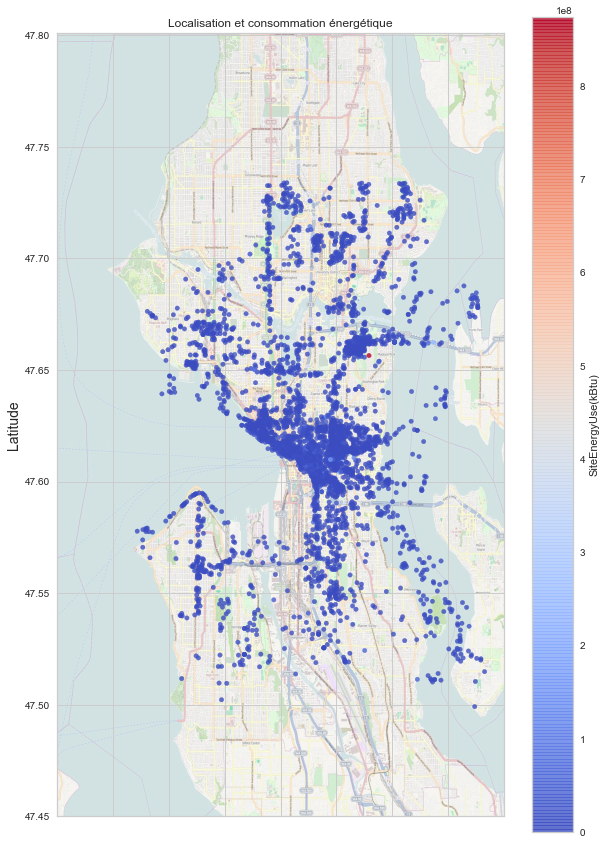

In [211]:
import matplotlib.image as mpimg
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df_2016.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="SiteEnergyUse(kBtu)", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et consommation énergétique")

plt.show()

On observe une concentration de bâtiments non-résidents dans le centre-ville de Seattle. Cela s'explique par le fait que beaucoup de bâtiments non-résidentiels sont des bureaux. Les bâtiments qui se situent en dehors du centre-ville vont être des entrepots, des campus ou encore des hôpitaux.

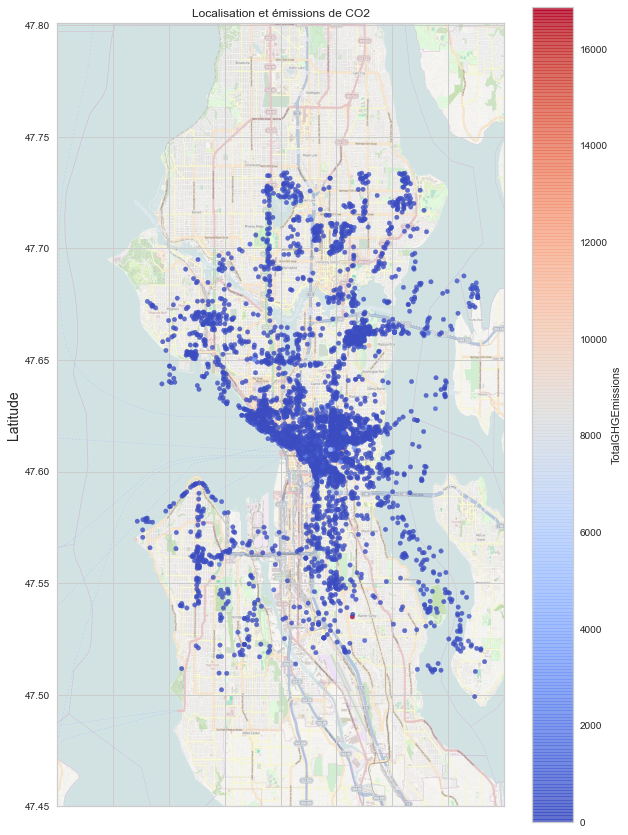

In [212]:
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df_2016.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="TotalGHGEmissions", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et émissions de CO2")

plt.show()

La répartition des bâtiments est la même que pour la consommation d'énergie.

### 2.2) Analyses univariées <a class="anchor" id="section2_2"></a>

In [213]:
# Séparation des variables catégorielles et numériques
cat_var = ["PrimaryPropertyType", "Neighborhood", "HasParking",
           "NumberofBuildings", "NumberofFloors", "NbofBuildings", "NbofFloors", "Clusters"]

num_var = ["YearBuilt","ENERGYSTARScore", "PropertyGFATotal",
           "SiteEnergyUse(kBtu)", "TotalGHGEmissions", "Age"]

- Distribution des variables catégorielles

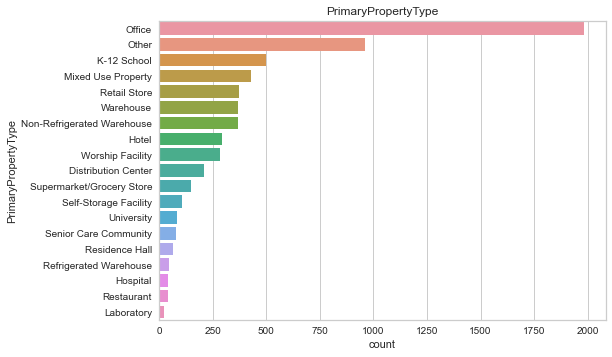

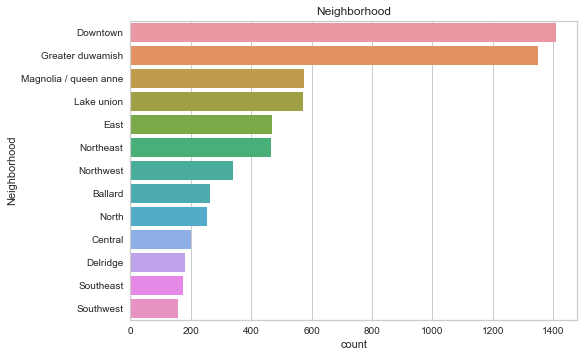

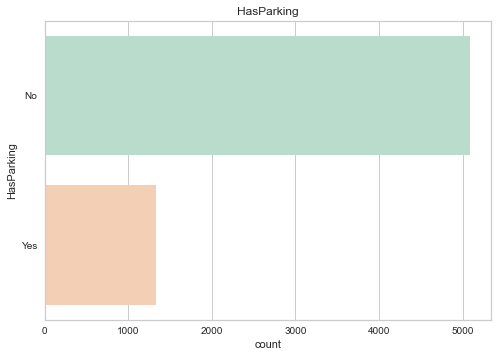

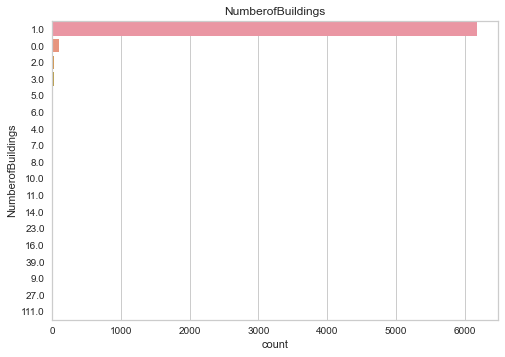

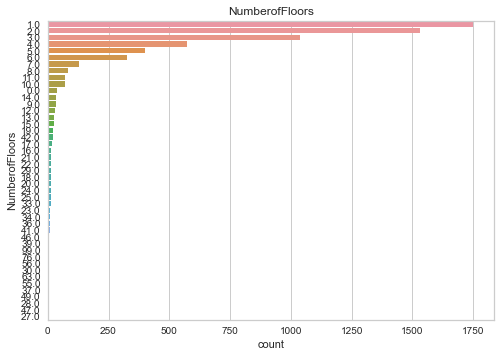

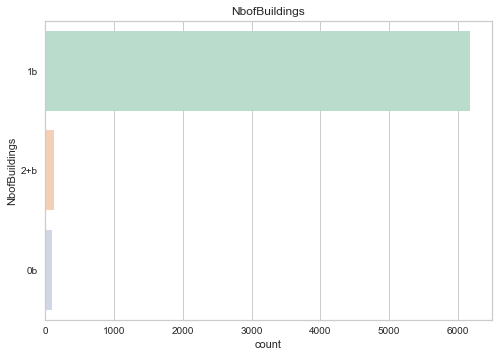

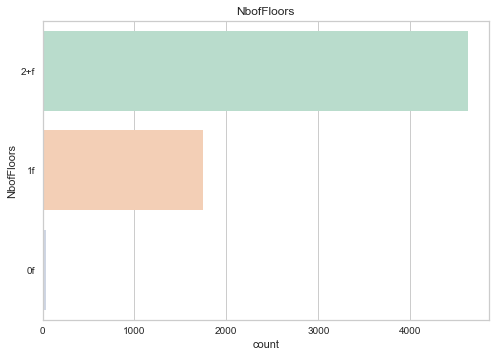

In [214]:
for cols in cat_var:
    sns.countplot(y=cols, data=df, order=df[cols].value_counts().index)
    plt.title(cols)
    plt.show()

- Distribution des variables quantitatives

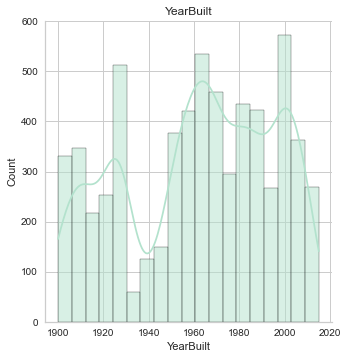

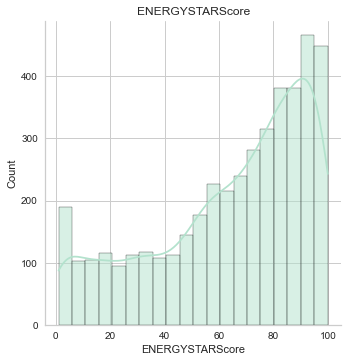

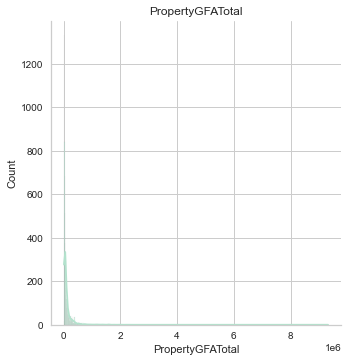

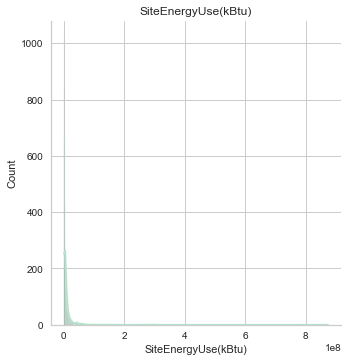

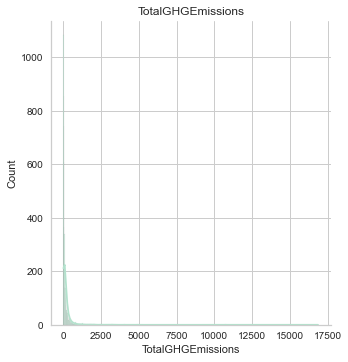

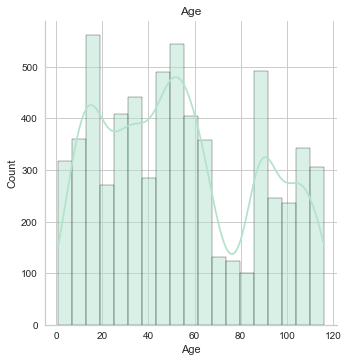

In [215]:
for cols in num_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

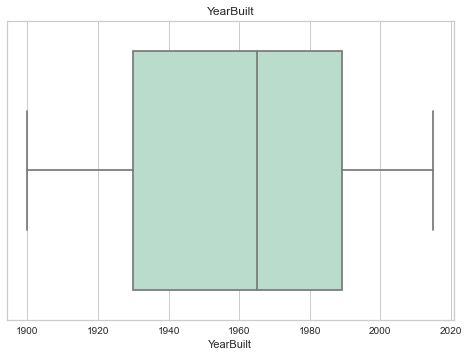

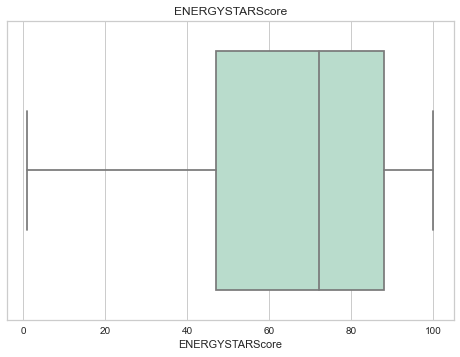

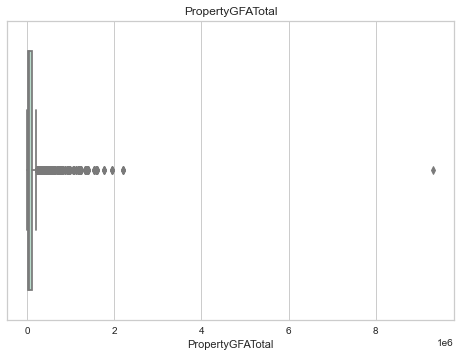

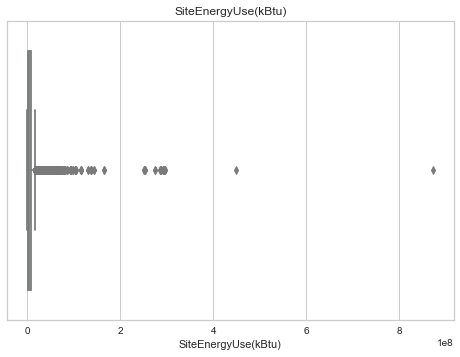

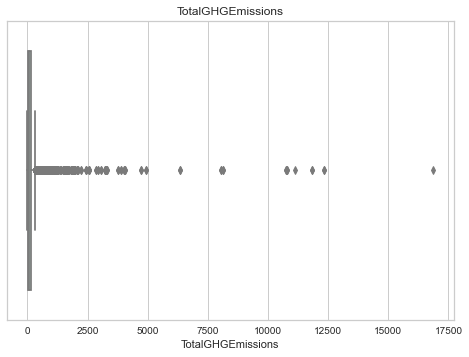

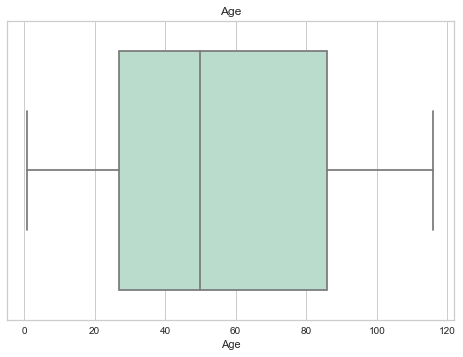

In [216]:
for cols in num_var:
    sns.boxplot(x=cols, data=df)
    plt.title(cols)
    plt.show()

In [217]:
pg.normality(df,method="normaltest")

,W,pval,normal
YearBuilt,2044.331787,0.000000e+00,False
NumberofBuildings,18911.982408,0.000000e+00,False
NumberofFloors,7358.689690,0.000000e+00,False
PropertyGFATotal,12055.054511,0.000000e+00,False
ENERGYSTARScore,441.894273,1.106312e-96,False
SiteEnergyUse(kBtu),12664.402531,0.000000e+00,False
TotalGHGEmissions,11889.749314,0.000000e+00,False
Latitude,74.736272,5.905065e-17,False
Longitude,90.935131,1.793441e-20,False
Age,2041.250907,0.000000e+00,False


In [218]:
pg.homoscedasticity(df, method="levene")

,W,pval,equal_var
levene,NaN,NaN,False


Nos données ne semblent pas suivre une loi normale et l'homogénéité des variances n'est pas respectée. 

In [219]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Age,degreeDaysH,degreeDaysC,Clusters
count,6411.000000,6411.000000,6395.000000,6.411000e+03,4330.000000,6.411000e+03,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000
mean,1961.615193,1.102324,4.163409,1.146557e+05,64.639261,7.931739e+06,173.536824,47.615716,-122.333032,53.887693,4049.253939,330.046951,1.391827
std,32.585607,1.789329,6.637589,2.253425e+05,28.579985,2.237740e+07,622.300581,0.048086,0.024407,32.588416,44.002699,78.504816,0.955951
min,1900.000000,0.000000,0.000000,1.128500e+04,1.000000,4.429350e+04,0.310000,47.499170,-122.411820,1.000000,4005.000000,252.000000,0.000000
25%,1930.000000,1.000000,1.000000,2.950300e+04,47.000000,1.249016e+06,20.140000,47.585150,-122.343320,27.000000,4005.000000,252.000000,1.000000
50%,1965.000000,1.000000,2.000000,4.906600e+04,72.000000,2.551022e+06,49.550000,47.612290,-122.333030,50.000000,4093.000000,252.000000,1.000000
75%,1989.000000,1.000000,4.000000,1.051000e+05,88.000000,7.003615e+06,139.225000,47.649120,-122.322110,86.000000,4093.000000,409.000000,2.000000
max,2015.000000,111.000000,99.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,47.733870,-122.258640,116.000000,4093.000000,409.000000,3.000000


In [220]:
df.groupby("PrimaryPropertyType")["TotalGHGEmissions"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                      4868.863000
Laboratory                     827.916364
University                     638.052588
Hotel                          403.989831
Senior Care Community          382.895455
Supermarket/Grocery Store      227.941600
Other                          215.854818
Mixed Use Property             195.157925
Restaurant                     165.112750
Office                         112.171794
K-12 School                     92.674157
Retail Store                    88.533575
Residence Hall                  80.922424
Distribution Center             50.337915
Warehouse                       42.234892
Worship Facility                42.007535
Non-Refrigerated Warehouse      40.216848
Refrigerated Warehouse          36.185000
Self-Storage Facility           23.888257
Name: TotalGHGEmissions, dtype: float64

In [221]:
df.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                      1.360147e+08
University                    2.856848e+07
Laboratory                    2.620197e+07
Hotel                         1.235547e+07
Senior Care Community         1.181569e+07
Supermarket/Grocery Store     9.949897e+06
Other                         9.834130e+06
Mixed Use Property            9.104289e+06
Office                        8.407578e+06
Retail Store                  4.898421e+06
Restaurant                    4.831032e+06
Refrigerated Warehouse        3.665475e+06
K-12 School                   3.079685e+06
Distribution Center           2.813730e+06
Residence Hall                2.714750e+06
Warehouse                     1.962824e+06
Non-Refrigerated Warehouse    1.739336e+06
Worship Facility              1.179291e+06
Self-Storage Facility         9.361272e+05
Name: SiteEnergyUse(kBtu), dtype: float64

In [222]:
df.groupby("Neighborhood")["TotalGHGEmissions"].mean().sort_values(ascending=False)

Neighborhood
East                     474.956489
Downtown                 217.661143
Northeast                205.650343
Lake union               190.515629
Central                  170.819800
Northwest                147.865651
Southwest                142.749686
Magnolia / queen anne    124.188524
Southeast                114.439029
Ballard                  107.081019
Delridge                  99.634833
North                     91.073320
Greater duwamish          81.755878
Name: TotalGHGEmissions, dtype: float64

In [223]:
df.groupby("Neighborhood")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

Neighborhood
East                     1.420076e+07
Downtown                 1.234069e+07
Lake union               9.997579e+06
Northeast                8.931269e+06
Central                  6.529029e+06
Magnolia / queen anne    5.890129e+06
Northwest                5.807789e+06
Southwest                4.672539e+06
Delridge                 4.495628e+06
North                    4.324107e+06
Ballard                  4.302162e+06
Southeast                4.274986e+06
Greater duwamish         4.243029e+06
Name: SiteEnergyUse(kBtu), dtype: float64

### 2.3) Analyses bivariées <a class="anchor" id="section_2_3"></a>

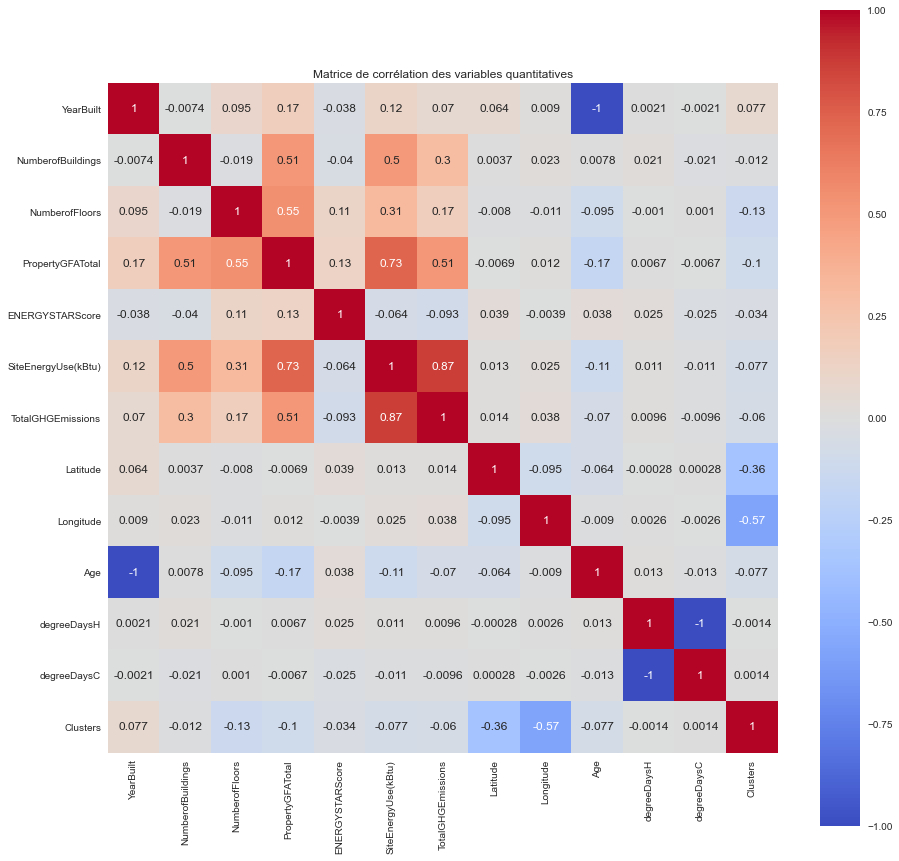

In [224]:
matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(matrix, square=True, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

On observe une forte corrélation entre la consommation d'énergie et les émissions de gaz à effets de serre. 

In [225]:
matrix['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

SiteEnergyUse(kBtu)    1.000000
TotalGHGEmissions      0.870082
PropertyGFATotal       0.733217
NumberofBuildings      0.495195
NumberofFloors         0.313333
YearBuilt              0.115138
Longitude              0.024501
Latitude               0.013009
degreeDaysH            0.010741
degreeDaysC           -0.010741
ENERGYSTARScore       -0.063535
Clusters              -0.077433
Age                   -0.114963
Name: SiteEnergyUse(kBtu), dtype: float64

La superficie des propriétés et le nombre de bâtiments sont très fortement corrélés avec la consommation d'énergie. 

In [226]:
matrix['TotalGHGEmissions'].sort_values(ascending=False)

TotalGHGEmissions      1.000000
SiteEnergyUse(kBtu)    0.870082
PropertyGFATotal       0.508359
NumberofBuildings      0.302425
NumberofFloors         0.166549
YearBuilt              0.069655
Longitude              0.037601
Latitude               0.014304
degreeDaysH            0.009577
degreeDaysC           -0.009577
Clusters              -0.060390
Age                   -0.069502
ENERGYSTARScore       -0.092989
Name: TotalGHGEmissions, dtype: float64

La superficie des propriétés et le nombre de bâtiments sont moyennement corrélés avec la consommation d'énergie. 

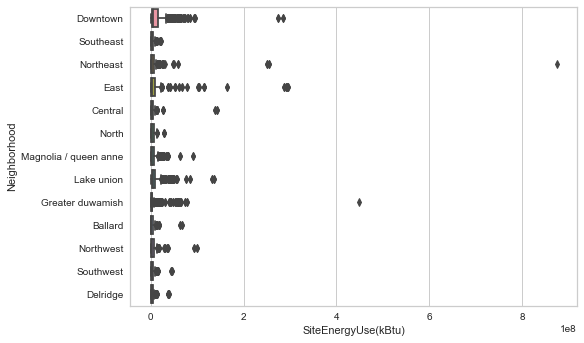

In [227]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="Neighborhood", data=df)
plt.show()

In [228]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,6398,14.391014,3.709741e-30,0.026282


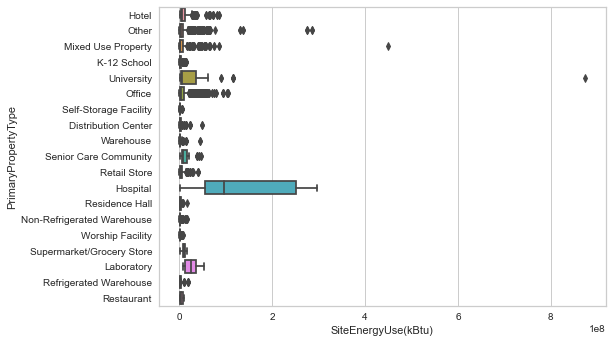

In [229]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=df)
plt.show()

In [230]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,18,6392,114.213713,0.0,0.243357


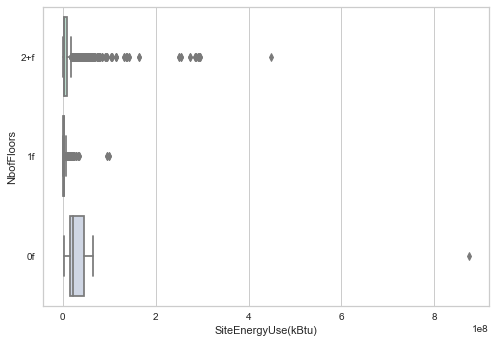

In [231]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="NbofFloors", data=df)
plt.show()

In [232]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="NbofFloors")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofFloors,2,6408,109.03247,2.726942e-47,0.03291


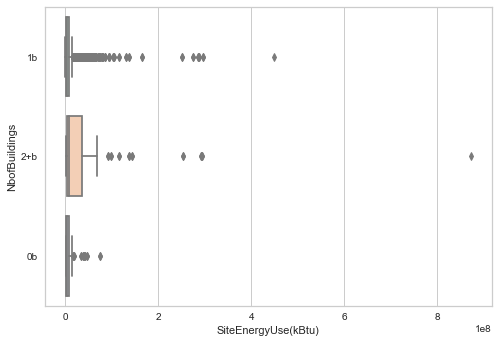

In [233]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="NbofBuildings", data=df)
plt.show()

In [234]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="NbofBuildings")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofBuildings,2,6408,150.732222,1.074015e-64,0.044931


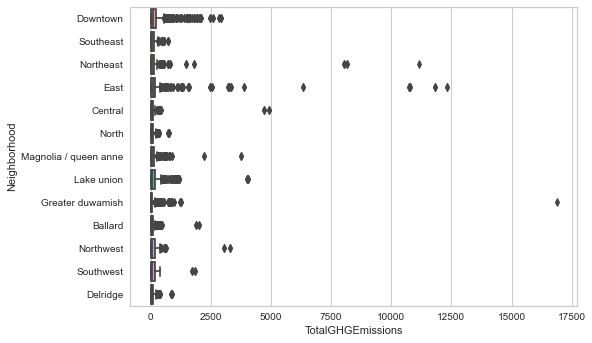

In [235]:
sns.boxplot(x="TotalGHGEmissions", y="Neighborhood", data=df)
plt.show()

In [236]:
pg.anova(data=df, dv="TotalGHGEmissions", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,6398,14.045425,2.487173e-29,0.025667


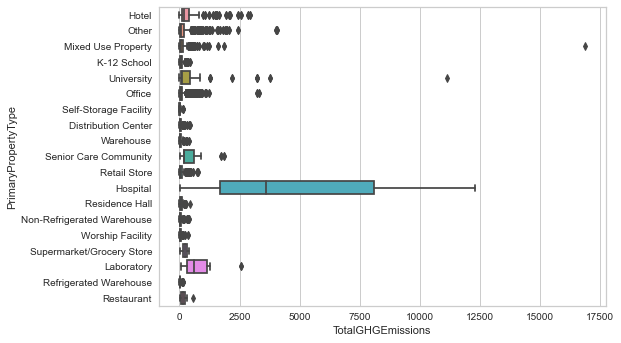

In [237]:
sns.boxplot(x="TotalGHGEmissions", y="PrimaryPropertyType", data=df)
plt.show()

In [238]:
pg.anova(data=df, dv="TotalGHGEmissions", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,18,6392,227.529304,0.0,0.390514


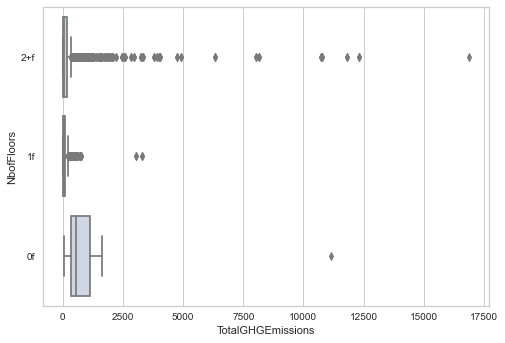

In [239]:
sns.boxplot(x="TotalGHGEmissions", y="NbofFloors", data=df)
plt.show()

In [240]:
pg.anova(data=df, dv="TotalGHGEmissions", between="NbofFloors")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofFloors,2,6408,46.416423,9.687822e-21,0.01428


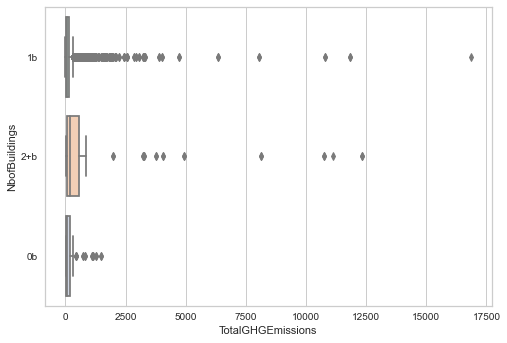

In [241]:
sns.boxplot(x="TotalGHGEmissions", y="NbofBuildings", data=df)
plt.show()

In [242]:
pg.anova(data=df, dv="TotalGHGEmissions", between="NbofBuildings")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofBuildings,2,6408,154.589998,2.702695e-66,0.046028


## 3) Références bibliographiques et définitions <a class="anchor" id="chapter3"></a>

**Définitions**
- **SiteEnergyUse :** The annual amount of energy consumed by the property from all sources of energy.
- **GHGEmissions :** The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

*Source* : [Ville de Seattle](!https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m)

**Sources :**

- [Différence entre source et site](!https://www.energystar.gov/buildings/benchmark/understand_metrics/source_site_difference)
- [Définition de l'EUI](!https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui)
- [Energy Star Score](!https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results)
- [Définition des types de bâtiments](!https://portfoliomanager.energystar.gov/pm/glossary)